In [74]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
market = pd.read_csv("market.csv")
market.index= market['date']
market = market.drop(columns=['Unnamed: 0'])
market= market.drop(columns=['SN'])
market = market.drop(columns=['date'])
market

,open,high,low,close,change,pct_change,turnover
date,,,,,,,
2022-07-07,2051.50,2079.30,2023.13,2027.32,-16.60,-0.81,1.806205e+09
2022-07-05,2078.63,2091.29,2026.37,2030.59,-46.08,-2.22,2.968485e+09
2022-07-04,2095.62,2148.16,2059.25,2076.67,-9.75,-0.47,4.349274e+09
2022-07-03,2028.79,2086.42,2021.00,2086.42,57.65,2.84,2.480474e+09
2022-06-30,1966.86,2037.64,1966.86,2037.64,74.93,3.82,2.458619e+09
...,...,...,...,...,...,...,...
2019-09-23,1139.92,1147.85,1137.87,1140.98,1.73,0.15,1.772790e+08
2019-08-26,1209.70,1210.24,1199.31,1203.13,-6.49,-0.54,3.805966e+08
2019-07-31,1259.53,1267.73,1257.91,1265.57,6.20,0.49,3.700020e+08


In [75]:
data_with_indicators_cleaned.columns

Index(['open', 'high', 'low', 'close', 'MA20', 'MA50', 'Daily_Returns',
       'Volatility', 'EMA20', 'EMA50', 'RSI', 'Bollinger_MA20',
       'Bollinger_Upper', 'Bollinger_Lower', 'EMA12', 'EMA26', 'MACD',
       'MACD_Signal'],
      dtype='object')

In [78]:
def standardize_data(df):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)



def standardize_data(df):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)


# Add technical indicators
def add_technical_indicators(df):
    # Moving Averages
    df['MA20'] = df['close'].rolling(window=20).mean()
    df['MA50'] = df['close'].rolling(window=50).mean()

    # Daily Returns
    df['Daily_Returns'] = df['pct_change']
    
    # Volatility (20-day rolling standard deviation of daily returns)
    df['Volatility'] = df['Daily_Returns'].rolling(window=20).std()



     # Exponential Moving Average (EMA)
    df['EMA20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['EMA50'] = df['close'].ewm(span=50, adjust=False).mean()

    # Relative Strength Index (RSI)
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands (20-day SMA and 2 standard deviations)
    df['Bollinger_MA20'] = df['close'].rolling(window=20).mean()
    df['Bollinger_Upper'] = df['Bollinger_MA20'] + 2 * df['close'].rolling(window=20).std()
    df['Bollinger_Lower'] = df['Bollinger_MA20'] - 2 * df['close'].rolling(window=20).std()

    # MACD (Moving Average Convergence Divergence)
    df['EMA12'] = df['close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    

    return df



In [79]:
data_with_indicators = add_technical_indicators(market)

# Display the first few rows of the data with indicators
data_with_indicators

,open,high,low,close,change,pct_change,turnover,MA20,MA50,Daily_Returns,...,EMA20,EMA50,RSI,Bollinger_MA20,Bollinger_Upper,Bollinger_Lower,EMA12,EMA26,MACD,MACD_Signal
date,,,,,,,,,,,,,,,,,,,,,
2022-07-07,2051.50,2079.30,2023.13,2027.32,-16.60,-0.81,1.806205e+09,NaN,NaN,-0.81,...,2027.320000,2027.320000,NaN,NaN,NaN,NaN,2027.320000,2027.320000,0.000000,0.000000
2022-07-05,2078.63,2091.29,2026.37,2030.59,-46.08,-2.22,2.968485e+09,NaN,NaN,-2.22,...,2027.631429,2027.448235,NaN,NaN,NaN,NaN,2027.823077,2027.562222,0.260855,0.052171
2022-07-04,2095.62,2148.16,2059.25,2076.67,-9.75,-0.47,4.349274e+09,NaN,NaN,-0.47,...,2032.301769,2029.378501,NaN,NaN,NaN,NaN,2035.337988,2031.199835,4.138153,0.869367
2022-07-03,2028.79,2086.42,2021.00,2086.42,57.65,2.84,2.480474e+09,NaN,NaN,2.84,...,2037.455886,2031.615422,NaN,NaN,NaN,NaN,2043.196759,2035.290218,7.906541,2.276802
2022-06-30,1966.86,2037.64,1966.86,2037.64,74.93,3.82,2.458619e+09,NaN,NaN,3.82,...,2037.473421,2031.851680,NaN,NaN,NaN,NaN,2042.341873,2035.464276,6.877597,3.196961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-23,1139.92,1147.85,1137.87,1140.98,1.73,0.15,1.772790e+08,1206.0935,1327.9186,0.15,...,1205.878423,1312.246961,19.431369,1206.0935,1343.542832,1068.644168,1168.295769,1230.751842,-62.456073,-61.880442
2019-08-26,1209.70,1210.24,1199.31,1203.13,-6.49,-0.54,3.805966e+08,1199.9810,1323.9040,-0.54,...,1205.616669,1307.967865,39.865099,1199.9810,1325.445002,1074.516998,1173.654882,1228.705780,-55.050898,-60.514533
2019-07-31,1259.53,1267.73,1257.91,1265.57,6.20,0.49,3.700020e+08,1198.2285,1321.2898,0.49,...,1211.326510,1306.305203,58.592674,1198.2285,1318.651490,1077.805510,1187.795669,1231.436463,-43.640794,-57.139785


In [80]:
## remove and only making this  Date	Open	High	Low	Close	Adj Close	Volume	MA20	MA50	Daily Returns	Volatility
data_with_indicators= data_with_indicators.drop(columns=['change', 'pct_change', 'turnover'])

data_with_indicators.columns

Index(['open', 'high', 'low', 'close', 'MA20', 'MA50', 'Daily_Returns',
       'Volatility', 'EMA20', 'EMA50', 'RSI', 'Bollinger_MA20',
       'Bollinger_Upper', 'Bollinger_Lower', 'EMA12', 'EMA26', 'MACD',
       'MACD_Signal'],
      dtype='object')

In [81]:
(data_with_indicators.isnull()).sum()

open                0
high                0
low                 0
close               0
MA20               19
MA50               49
Daily_Returns       0
Volatility         19
EMA20               0
EMA50               0
RSI                13
Bollinger_MA20     19
Bollinger_Upper    19
Bollinger_Lower    19
EMA12               0
EMA26               0
MACD                0
MACD_Signal         0
dtype: int64

## low datasets 

In [82]:
data_with_indicators_cleaned= (data_with_indicators.iloc[50: , :])


In [83]:
data_with_indicators_cleaned

,open,high,low,close,MA20,MA50,Daily_Returns,Volatility,EMA20,EMA50,RSI,Bollinger_MA20,Bollinger_Upper,Bollinger_Lower,EMA12,EMA26,MACD,MACD_Signal
date,,,,,,,,,,,,,,,,,,
2022-03-31,2568.76,2584.22,2538.78,2544.31,2383.8335,2191.4174,-0.93,1.241493,2382.342068,2253.406449,68.344680,2383.8335,2536.637716,2231.029284,2432.659337,2348.858143,83.801193,77.359485
2022-03-30,2527.77,2568.26,2516.12,2568.26,2393.7935,2202.1708,1.61,1.150407,2400.048538,2265.753647,70.676030,2393.7935,2567.131749,2220.455251,2453.520977,2365.110132,88.410845,79.569757
2022-03-27,2623.20,2641.51,2569.02,2572.26,2408.9640,2212.0826,-1.58,1.141302,2416.449629,2277.773504,69.981975,2408.9640,2589.230316,2228.697684,2471.788519,2380.454567,91.333952,81.922596
2022-03-24,2630.93,2638.62,2611.96,2613.67,2427.7165,2222.6276,-0.63,1.118548,2435.232522,2290.945916,82.249474,2427.7165,2611.369537,2244.063463,2493.616439,2397.729784,95.886655,84.715407
2022-03-23,2651.41,2653.24,2623.08,2630.36,2445.4500,2234.4820,-0.77,1.104867,2453.816091,2304.256272,81.628257,2445.4500,2635.670300,2255.229700,2514.653910,2414.961652,99.692258,87.710778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-23,1139.92,1147.85,1137.87,1140.98,1206.0935,1327.9186,0.15,1.216437,1205.878423,1312.246961,19.431369,1206.0935,1343.542832,1068.644168,1168.295769,1230.751842,-62.456073,-61.880442
2019-08-26,1209.70,1210.24,1199.31,1203.13,1199.9810,1323.9040,-0.54,1.222417,1205.616669,1307.967865,39.865099,1199.9810,1325.445002,1074.516998,1173.654882,1228.705780,-55.050898,-60.514533
2019-07-31,1259.53,1267.73,1257.91,1265.57,1198.2285,1321.2898,0.49,1.178090,1211.326510,1306.305203,58.592674,1198.2285,1318.651490,1077.805510,1187.795669,1231.436463,-43.640794,-57.139785


In [84]:
features = data_with_indicators_cleaned.drop(['close'], axis=1)
target = data_with_indicators_cleaned['close']

In [85]:
data_with_indicators_cleaned.columns

Index(['open', 'high', 'low', 'close', 'MA20', 'MA50', 'Daily_Returns',
       'Volatility', 'EMA20', 'EMA50', 'RSI', 'Bollinger_MA20',
       'Bollinger_Upper', 'Bollinger_Lower', 'EMA12', 'EMA26', 'MACD',
       'MACD_Signal'],
      dtype='object')

In [86]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader




# Split into features and target
features = data_with_indicators_cleaned.drop(['close'], axis=1)
target = data_with_indicators_cleaned['close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Prepare LSTM sequences ===
def create_lstm_dataset(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_scaled, y_train.values, time_steps)
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_scaled, y_test.values, time_steps)

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_lstm).float()
y_train_tensor = torch.from_numpy(y_train_lstm).float().unsqueeze(1)
X_test_tensor  = torch.from_numpy(X_test_lstm).float()
y_test_tensor  = torch.from_numpy(y_test_lstm).float().unsqueeze(1)

# DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# === Define PyTorch LSTM Model ===
class LSTMModel(nn.Module):
    def __init__(self, num_features, hidden_size=100, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=num_features, 
            hidden_size=hidden_size, 
            num_layers=num_layers, 
            batch_first=True, 
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # last time step
        return self.fc(out)

num_features = X_train_lstm.shape[2]
model = LSTMModel(num_features)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Train the LSTM Model ===
epochs = 20
model.train()
for epoch in range(1, epochs + 1):
    epoch_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
    epoch_loss /= len(train_loader.dataset)
    print(f"Epoch {epoch}/{epochs}, Loss: {epoch_loss:.6f}")

# === LSTM Predictions ===
model.eval()
with torch.no_grad():
    lstm_preds = model(X_test_tensor).numpy().flatten()

# === Train Random Forest ===
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds_full = rf_model.predict(X_test_scaled)

# Align lengths for ensemble
min_len = min(len(lstm_preds), len(rf_preds_full))
ensemble_preds = (lstm_preds[:min_len] + rf_preds_full[:min_len]) / 2

# === Evaluate Ensemble ===
ensemble_mse = mean_squared_error(y_test_lstm[:min_len], ensemble_preds)
print("Ensemble Mean Squared Error:", ensemble_mse)


Epoch 1/20, Loss: 5738388.529968
Epoch 2/20, Loss: 5730463.744479
Epoch 3/20, Loss: 5714136.922713
Epoch 4/20, Loss: 5704471.728707
Epoch 5/20, Loss: 5697805.821767
Epoch 6/20, Loss: 5691888.641956
Epoch 7/20, Loss: 5686164.925868
Epoch 8/20, Loss: 5680575.512618
Epoch 9/20, Loss: 5675227.525237
Epoch 10/20, Loss: 5669893.572555
Epoch 11/20, Loss: 5664624.105678
Epoch 12/20, Loss: 5659190.230284
Epoch 13/20, Loss: 5653987.790221
Epoch 14/20, Loss: 5648828.365931
Epoch 15/20, Loss: 5643747.976341
Epoch 16/20, Loss: 5638744.938486
Epoch 17/20, Loss: 5633702.143533
Epoch 18/20, Loss: 5628772.982650
Epoch 19/20, Loss: 5623827.845426
Epoch 20/20, Loss: 5618891.391167
Ensemble Mean Squared Error: 1641965.5160771916


In [136]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(y_true, y_pred):
    """
    Plot actual vs predicted values.
    y_true: array of true values
    y_pred: array of predicted values
    scaled: indicates if values are in scaled space
    """
    plt.figure()
    plt.plot(y_true[:len(y_pred)], label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title('Actual vs Predicted Close Price' + ('    unscaled'))
    plt.xlabel('Time Step Index')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

def plot_feature_importances(model, feature_names):
    """
    Plot feature importances from a tree-based model.
    model: trained model with `feature_importances_` attribute
    feature_names: list of feature names in the same order the model was trained on
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure()
    plt.barh(np.array(feature_names)[indices], importances[indices])
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


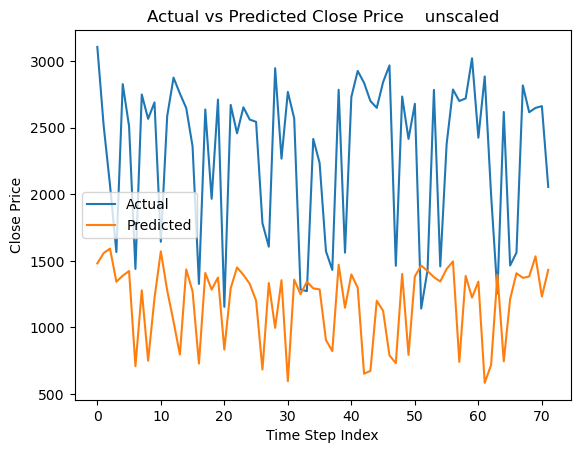

In [137]:
plot_actual_vs_predicted(y_test_lstm, ensemble_preds)

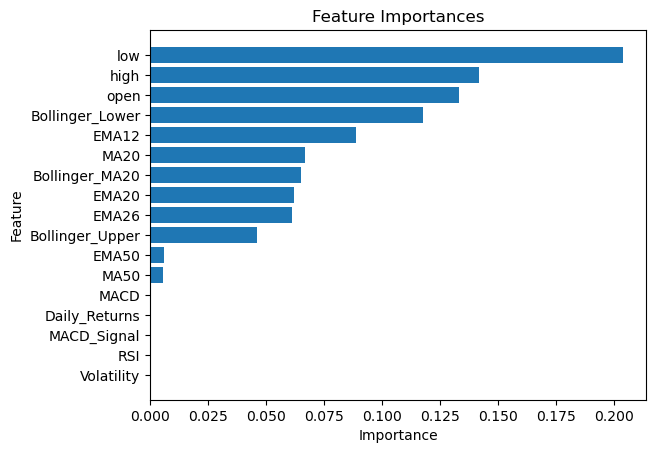

In [89]:
# After you do your train/test split:
feature_names = X_train.columns.tolist()  # X_train is a DataFrame

# Then call:
plot_feature_importances(rf_model, feature_names)


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        output, _ = self.lstm(x)
        out = self.fc(output[:, -1, :])  # last timestep
        return out

# Create sequences from DataFrame
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data.iloc[i - n_steps:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

# Monte Carlo Simulation
def monte_carlo_simulations(last_price, days, mu, sigma, simulations):
    results = np.zeros((days, simulations))
    for sim in range(simulations):
        prices = [last_price]
        for _ in range(days):
            prices.append(prices[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal()))
        results[:, sim] = prices[1:]
    return results

# Calculate annualized return and std deviation
def calculate_annualized_params(df):
    log_returns = np.log(df['close'] / df['close'].shift(1))

    #### here log calues also coantains inf so removing them
    log_returns = np.log(1 + df['close'].pct_change())

    # Check for and handle potential infinity values
    if np.isinf(log_returns).any():
        # Find where the infinity values are
        inf_indices = np.where(np.isinf(log_returns))[0]

            
        # Replace infinities with NaN or some other value
        log_returns = log_returns.replace([np.inf, -np.inf], np.nan)

    mu = np.mean(log_returns.dropna()) * 252
    sigma = np.std(log_returns.dropna()) * np.sqrt(252)
    return mu, sigma

# Training loop
def train_lstm_model(model, train_loader, val_loader, epochs=20, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs.squeeze(), y_batch)
                val_loss += loss.item()
                
        print(f"Epoch {epoch+1}: Train Loss = {train_loss / len(train_loader):.4f}, Val Loss = {val_loss / len(val_loader):.4f}")
    return model

# Main analysis function
def analyze_stocks(stock_list, n_steps, days_to_simulate, simulations):
    models_scalers = {}
    simulation_results = {}

    for stock in stock_list:
        df = pd.read_csv(f'{stock}.csv')
        features = ['open', 'high', 'low', 'close', 'MA20', 'MA50', 'Daily_Returns',
       'Volatility', 'EMA20', 'EMA50', 'RSI', 'Bollinger_MA20',
       'Bollinger_Upper', 'Bollinger_Lower', 'EMA12', 'EMA26', 'MACD',
       'MACD_Signal']

        # Scaling features
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df[features])
        scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

        # Create sequences
        X, y = create_sequences(scaled_df, n_steps)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train[:, features.index('close')], dtype=torch.float32)
        X_val = torch.tensor(X_val, dtype=torch.float32)
        y_val = torch.tensor(y_val[:, features.index('close')], dtype=torch.float32)

        train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
        val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)

        model = LSTMModel(input_size=X_train.shape[2])
        model = train_lstm_model(model, train_loader, val_loader)

        models_scalers[stock] = (model, scaler)

        last_price = df['close'].iloc[-1]
        mu, sigma = calculate_annualized_params(df)

        simulated_prices = monte_carlo_simulations(last_price, days_to_simulate, mu, sigma, simulations)
        simulation_results[stock] = simulated_prices

    return simulation_results



In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        output, _ = self.lstm(x)
        out = self.fc(output[:, -1, :])  # last timestep
        return out

# Create sequences from DataFrame
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data.iloc[i - n_steps:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)


# Monte Carlo Simulation
def monte_carlo_simulations(last_price, days, mu, sigma, simulations):
    results = np.zeros((days, simulations))
    for sim in range(simulations):
        prices = [last_price]
        for _ in range(days):
            prices.append(prices[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal()))
        results[:, sim] = prices[1:]
    return results

# Calculate annualized return and std deviation
def calculate_annualized_params(df):
    log_returns = np.log(df['close'] / df['close'].shift(1))

    #### here log calues also coantains inf so removing them
    log_returns = np.log(1 + df['close'].pct_change())

    # Check for and handle potential infinity values
    if np.isinf(log_returns).any():
        # Find where the infinity values are
        inf_indices = np.where(np.isinf(log_returns))[0]

            
        # Replace infinities with NaN or some other value
        log_returns = log_returns.replace([np.inf, -np.inf], np.nan)

    mu = np.mean(log_returns.dropna()) * 252
    sigma = np.std(log_returns.dropna()) * np.sqrt(252)
    return mu, sigma

# Training loop
def train_lstm_model(model, train_loader, val_loader, epochs=20, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs.squeeze(), y_batch)
                val_loss += loss.item()
                
        print(f"Epoch {epoch+1}: Train Loss = {train_loss / len(train_loader):.4f}, Val Loss = {val_loss / len(val_loader):.4f}")
    return model

# Main analysis function
def analyze_stocks(stock_list, n_steps, days_to_simulate, simulations):
    models_scalers = {}
    simulation_results = {}

    for stock in stock_list:
        df = pd.read_csv(f'{stock}.csv')
        features = ['open', 'high', 'low', 'close', 'MA20', 'MA50', 'Daily_Returns',
       'Volatility', 'EMA20', 'EMA50', 'RSI', 'Bollinger_MA20',
       'Bollinger_Upper', 'Bollinger_Lower', 'EMA12', 'EMA26', 'MACD',
       'MACD_Signal']

        # Scaling features
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df[features])
        scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

        # Create sequences
        X, y = create_sequences(scaled_df, n_steps)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train[:, features.index('close')], dtype=torch.float32)
        X_val = torch.tensor(X_val, dtype=torch.float32)
        y_val = torch.tensor(y_val[:, features.index('close')], dtype=torch.float32)

        train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
        val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)

        model = LSTMModel(input_size=X_train.shape[2])
        model = train_lstm_model(model, train_loader, val_loader)

        models_scalers[stock] = (model, scaler)

        last_price = df['close'].iloc[-1]
        mu, sigma = calculate_annualized_params(df)

        simulated_prices = monte_carlo_simulations(last_price, days_to_simulate, mu, sigma, simulations)
        simulation_results[stock] = simulated_prices

    return simulation_results



Epoch 1: Train Loss = 0.6307, Val Loss = 0.5076
Epoch 2: Train Loss = 0.2287, Val Loss = 0.1525
Epoch 3: Train Loss = 0.1173, Val Loss = 0.0972
Epoch 4: Train Loss = 0.0856, Val Loss = 0.0961
Epoch 5: Train Loss = 0.0775, Val Loss = 0.0822
Epoch 6: Train Loss = 0.0563, Val Loss = 0.0492
Epoch 7: Train Loss = 0.0822, Val Loss = 0.0374
Epoch 8: Train Loss = 0.0465, Val Loss = 0.0371
Epoch 9: Train Loss = 0.0426, Val Loss = 0.0280
Epoch 10: Train Loss = 0.0793, Val Loss = 0.0249
Epoch 11: Train Loss = 0.0430, Val Loss = 0.0280
Epoch 12: Train Loss = 0.0365, Val Loss = 0.0287
Epoch 13: Train Loss = 0.0427, Val Loss = 0.0205
Epoch 14: Train Loss = 0.0334, Val Loss = 0.0178
Epoch 15: Train Loss = 0.0317, Val Loss = 0.0179
Epoch 16: Train Loss = 0.0296, Val Loss = 0.0140
Epoch 17: Train Loss = 0.0270, Val Loss = 0.0142
Epoch 18: Train Loss = 0.0296, Val Loss = 0.0121
Epoch 19: Train Loss = 0.0258, Val Loss = 0.0136
Epoch 20: Train Loss = 0.0254, Val Loss = 0.0110


/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1: Train Loss = 0.6174, Val Loss = 0.5277
Epoch 2: Train Loss = 0.3667, Val Loss = 0.3058
Epoch 3: Train Loss = 0.2311, Val Loss = 0.1741
Epoch 4: Train Loss = 0.1607, Val Loss = 0.0548
Epoch 5: Train Loss = 0.1346, Val Loss = 0.0354
Epoch 6: Train Loss = 0.0969, Val Loss = 0.0288
Epoch 7: Train Loss = 0.0865, Val Loss = 0.0239
Epoch 8: Train Loss = 0.0809, Val Loss = 0.0189
Epoch 9: Train Loss = 0.0796, Val Loss = 0.0216
Epoch 10: Train Loss = 0.0813, Val Loss = 0.0170
Epoch 11: Train Loss = 0.0698, Val Loss = 0.0162
Epoch 12: Train Loss = 0.0656, Val Loss = 0.0155
Epoch 13: Train Loss = 0.0650, Val Loss = 0.0143
Epoch 14: Train Loss = 0.0625, Val Loss = 0.0136
Epoch 15: Train Loss = 0.0596, Val Loss = 0.0135
Epoch 16: Train Loss = 0.0617, Val Loss = 0.0133
Epoch 17: Train Loss = 0.0554, Val Loss = 0.0131
Epoch 18: Train Loss = 0.1538, Val Loss = 0.0143
Epoch 19: Train Loss = 0.0662, Val Loss = 0.0195
Epoch 20: Train Loss = 0.0534, Val Loss = 0.0194


/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


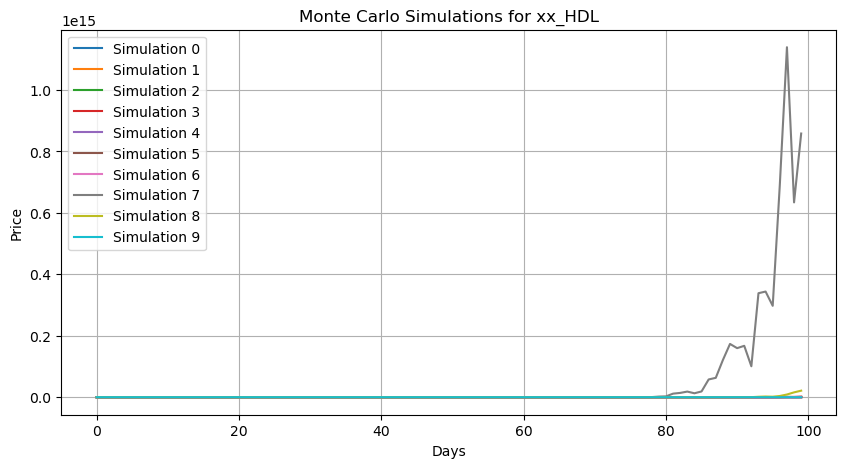

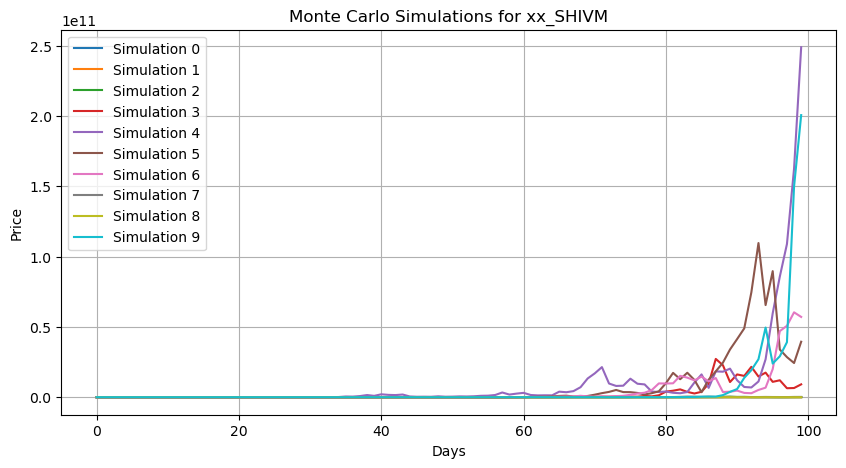

In [125]:
# Stock list, config
stock_list = ['xx_HDL', 'xx_SHIVM']
n_steps = 100
days_to_simulate = 100
simulations = 3000

# Run analysis
simulation_results = analyze_stocks(stock_list, n_steps, days_to_simulate, simulations)

# Plot results
for stock, sims in simulation_results.items():
    plt.figure(figsize=(10, 5))
    for i in range(min(sims.shape[1], 10)):  # Plot max 10 paths
        plt.plot(sims[:, i], label=f'Simulation {i}')
    plt.title(f'Monte Carlo Simulations for {stock}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [126]:
# Plot results with focus on days after 200
for stock, sims in simulation_results.items():
    plt.figure(figsize=(12, 6))
    
    # Only show data starting from day 200
    start_day = 200
    if sims.shape[0] > start_day:
        plot_data = sims[start_day:, :]
        
        # Plot up to 10 simulation paths
        for i in range(min(sims.shape[1], 10)):
            plt.plot(range(start_day, start_day + plot_data.shape[0]), plot_data[:, i], label=f'Simulation {i}')
        
        plt.title(f'Monte Carlo Simulations for {stock} (Days {start_day}-{days_to_simulate})')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough days in simulation to start from day {start_day}")

Not enough days in simulation to start from day 200
Not enough days in simulation to start from day 200


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Epoch 1: Train Loss = 0.7037, Val Loss = 0.6447
Epoch 2: Train Loss = 0.3479, Val Loss = 0.2473
Epoch 3: Train Loss = 0.1399, Val Loss = 0.1018
Epoch 4: Train Loss = 0.1026, Val Loss = 0.0942
Epoch 5: Train Loss = 0.0735, Val Loss = 0.0884
Epoch 6: Train Loss = 0.0679, Val Loss = 0.0658
Epoch 7: Train Loss = 0.0537, Val Loss = 0.0481
Epoch 8: Train Loss = 0.0519, Val Loss = 0.0369
Epoch 9: Train Loss = 0.0427, Val Loss = 0.0332
Epoch 10: Train Loss = 0.0421, Val Loss = 0.0264
Epoch 11: Train Loss = 0.0389, Val Loss = 0.0219
Epoch 12: Train Loss = 0.0344, Val Loss = 0.0236
Epoch 13: Train Loss = 0.0328, Val Loss = 0.0184
Epoch 14: Train Loss = 0.0333, Val Loss = 0.0183
Epoch 15: Train Loss = 0.0301, Val Loss = 0.0181
Epoch 16: Train Loss = 0.0299, Val Loss = 0.0142
Epoch 17: Train Loss = 0.0279, Val Loss = 0.0150
Epoch 18: Train Loss = 0.0271, Val Loss = 0.0144
Epoch 19: Train Loss = 0.0286, Val Loss = 0.0134
Epoch 20: Train Loss = 0.0282, Val Loss = 0.0126


/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1: Train Loss = 0.5575, Val Loss = 0.4701
Epoch 2: Train Loss = 0.3283, Val Loss = 0.2716
Epoch 3: Train Loss = 0.1960, Val Loss = 0.0974
Epoch 4: Train Loss = 0.1210, Val Loss = 0.0531
Epoch 5: Train Loss = 0.1097, Val Loss = 0.0308
Epoch 6: Train Loss = 0.0951, Val Loss = 0.0238
Epoch 7: Train Loss = 0.0837, Val Loss = 0.0200
Epoch 8: Train Loss = 0.0808, Val Loss = 0.0211
Epoch 9: Train Loss = 0.0771, Val Loss = 0.0195
Epoch 10: Train Loss = 0.0723, Val Loss = 0.0189
Epoch 11: Train Loss = 0.0709, Val Loss = 0.0149
Epoch 12: Train Loss = 0.0687, Val Loss = 0.0149
Epoch 13: Train Loss = 0.0668, Val Loss = 0.0159
Epoch 14: Train Loss = 0.0648, Val Loss = 0.0136
Epoch 15: Train Loss = 0.0607, Val Loss = 0.0183
Epoch 16: Train Loss = 0.0606, Val Loss = 0.0164
Epoch 17: Train Loss = 0.0590, Val Loss = 0.0153
Epoch 18: Train Loss = 0.0557, Val Loss = 0.0127
Epoch 19: Train Loss = 0.0563, Val Loss = 0.0136
Epoch 20: Train Loss = 0.0588, Val Loss = 0.0121


/home/ujjwal/anaconda3/envs/dl-env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


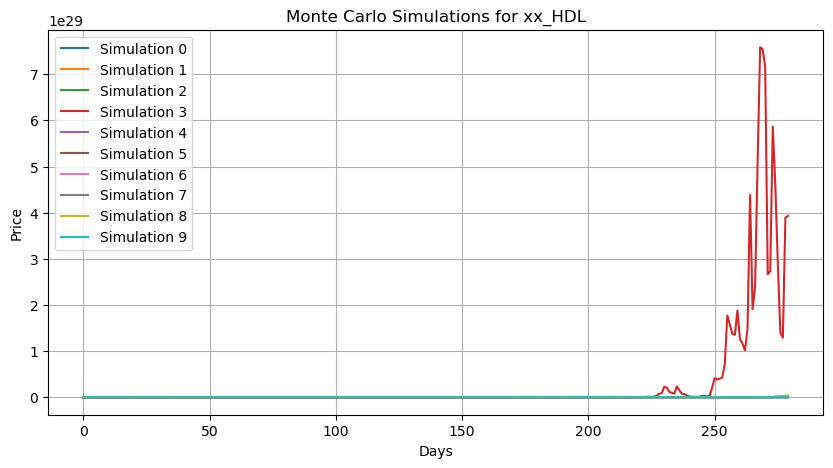

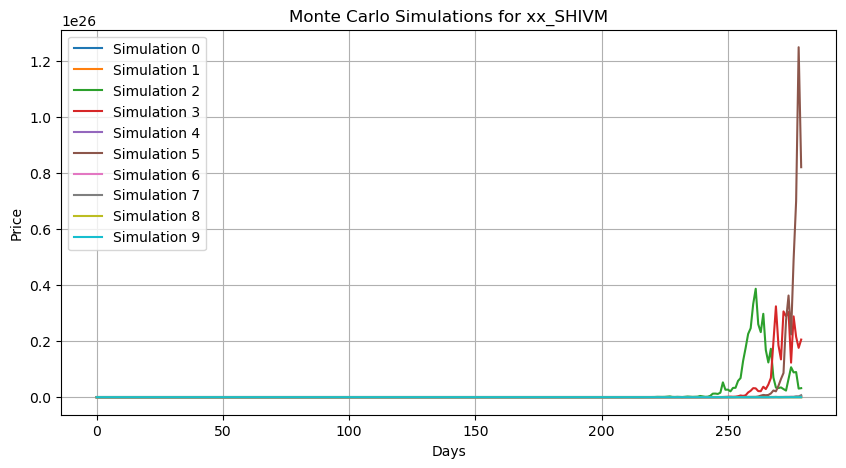

In [123]:
# Stock list, config
stock_list = ['xx_HDL', 'xx_SHIVM']
n_steps = 100
days_to_simulate = 280
simulations = 10000

# Run analysis
simulation_results = analyze_stocks(stock_list, n_steps, days_to_simulate, simulations)

# Plot results
for stock, sims in simulation_results.items():
    plt.figure(figsize=(10, 5))
    for i in range(min(sims.shape[1], 10)):  # Plot max 10 paths
        plt.plot(sims[:, i], label=f'Simulation {i}')
    plt.title(f'Monte Carlo Simulations for {stock}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

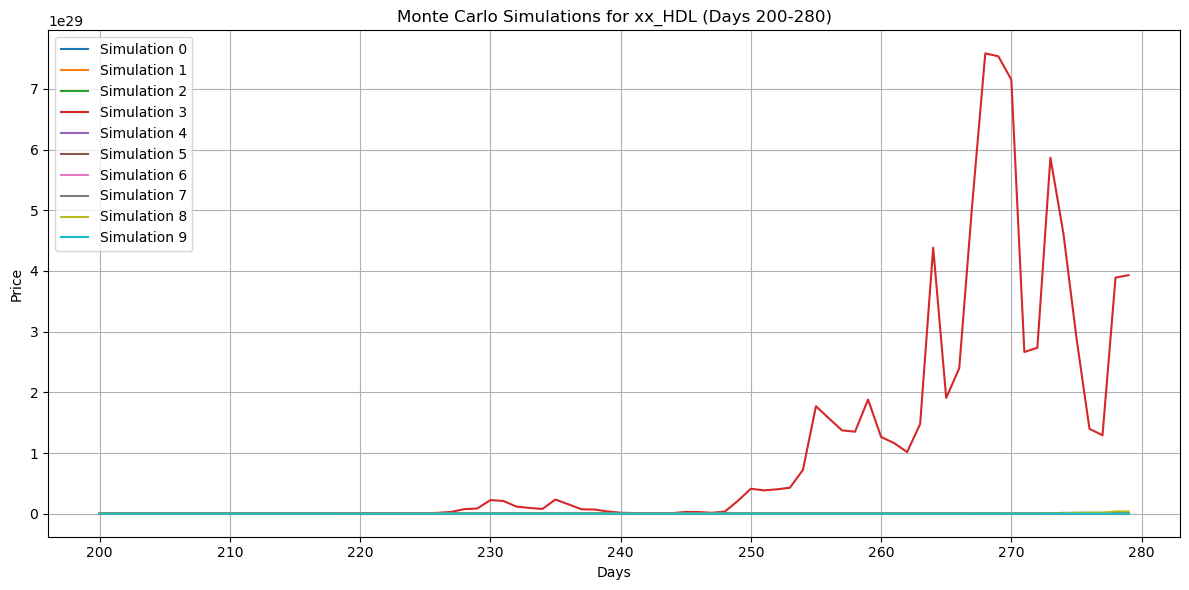

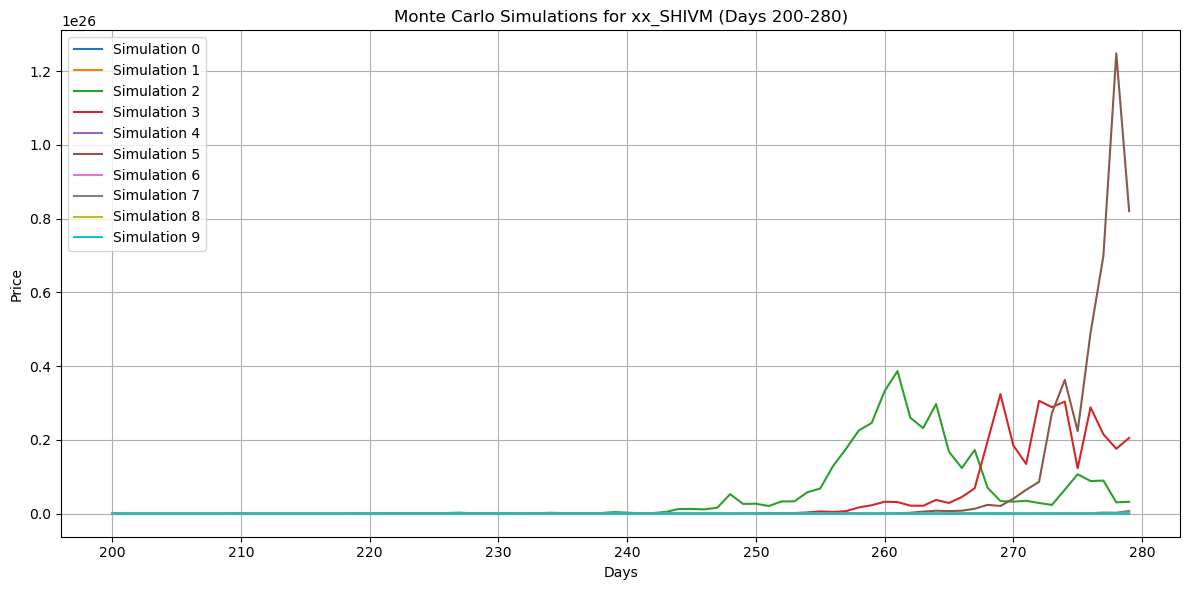

In [124]:
# Plot results with focus on days after 200
for stock, sims in simulation_results.items():
    plt.figure(figsize=(12, 6))
    
    # Only show data starting from day 200
    start_day = 200
    if sims.shape[0] > start_day:
        plot_data = sims[start_day:, :]
        
        # Plot up to 10 simulation paths
        for i in range(min(sims.shape[1], 10)):
            plt.plot(range(start_day, start_day + plot_data.shape[0]), plot_data[:, i], label=f'Simulation {i}')
        
        plt.title(f'Monte Carlo Simulations for {stock} (Days {start_day}-{days_to_simulate})')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough days in simulation to start from day {start_day}")

In [127]:
train_data = data[:329]  # Use for modeling
test_data = data[329:]   # Use to test prediction accuracy


### experiemtns 
